<a href="https://colab.research.google.com/github/khushijashnani/CEEL-82B---Data-Science/blob/master/DS_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Science - Tutorial 2**

*Topic - Feature Engineering: Dimensional Reduction*

Name - Khushi Jashnani

UID - 2018130017

A Batch (Roll no - 10)

---
**Question 1 :** What is ‘Curse of Dimensionality’? Explain.

**Answer :** 
- Curse of Dimensionality signifies a concept that post a certain threshold or number of features/attributes of the dataset, the error increases as the large number of features account for creating noise and redundancy in the dataset. 
- A higher number of dimensions theoretically allows more information to be stored, but practically it rarely helps due to the former reasons.

---
**Question 2 :** What is feature selection? Why is it needed? What are the different approaches of feature selection?

**Answer :** 
- Feature selection is part of the life cycle of a data science project which comes after data cleaning. 
- It is significantly useful in the cases where we face Curse of Dimensionality in which there are numerous features available but we only need a few of them which are actually useful and remove the ones which are just adding on to the noise and redundancy in our dataset. 
- The data features that we use to train your machine learning models have a huge influence on the performance we can achieve. Irrelevant or partially relevant features can negatively impact model performance. 
- The different techniques for feature selection are filter methods, wrapper methods, embedded methods under which univariate selection (statistical tests), feature importance (Tree based feature selection), correlation coefficients are the most efficient ones.

---

### **Problem 1**

Linear Discriminant Analysis, or LDA for short, is a classification machine learning algorithm.

It works by calculating summary statistics for the input features by class label, such as the mean and standard deviation. These statistics represent the model learned from the training data. In practice, linear algebra operations are used to calculate the required quantities efficiently via matrix decomposition.

Predictions are made by estimating the probability that a new example belongs to each class label based on the values of each input feature. The class that results in the largest probability is then assigned to the example. 

LDA assumes that the input variables are numeric and normally distributed and that they have the same variance (spread). If this is not the case, it may be desirable to transform the data to have a Gaussian distribution and standardize or normalize the data prior to modeling.

The LDA model is naturally multi-class. This means that it supports two-class classification problems and extends to more than two classes (multi-class classification) without modification or augmentation.

It is a linear classification algorithm, like logistic regression. This means that classes are separated in the feature space by lines or hyperplanes. Extensions of the method can be used that allow other shapes, like Quadratic Discriminant Analysis (QDA), which allows curved shapes in the decision boundary.

We can use PCA to calculate a projection of a dataset and select a number of dimensions or principal components of the projection to use as input to a model.

The scikit-learn library provides the PCA class that can be fit on a dataset and used to transform a training dataset and any additional dataset in the future.

The Linear Discriminant Analysis is available in the scikit-learn Python machine learning library via the LinearDiscriminantAnalysis class.

Demonstrate the Linear Discriminant Analysis method with a worked example.


In [28]:
!pip install scikit-plot

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Generating classification dataset

In [30]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

In [31]:
print(X.shape, y.shape)

(1000, 10) (1000,)


In [32]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### LDA Model

In [54]:
model = LinearDiscriminantAnalysis()

###Results through Training with default parameters

In [55]:
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [56]:
model.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [57]:
y_pred = model.predict(X_test)

Training Accuracy = 89.8%
Testing Accuracy = 91.0%

 Confusiton Matrix:
 [[353  51]
 [ 31 365]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90       404
           1       0.88      0.92      0.90       396

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

AUC:  0.9481635663566358


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


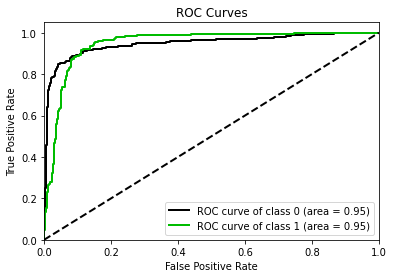

In [58]:
training_acc = round(accuracy_score(y_train, model.predict(X_train)),3)*100  
print('Training Accuracy = {}%'.format(training_acc))
print('Testing Accuracy = {}%'.format(round(accuracy_score(y_test, y_pred),3)*100))
print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_train, model.predict(X_train)))
print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_train, model.predict(X_train)))
print("AUC: ", roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))
auc_roc(y_train, model.predict_proba(X_train), curves=['each_class'])

###Results through Cross Validation

In [59]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [60]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [61]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.891 (0.030)


### Results through Tuning the model

In [62]:
# define grid
model_params = {
    'shrinkage' : np.arange(0, 1, 0.01),
    'solver': ['svd', 'lsqr', 'eigen']
}

grid_search = GridSearchCV(model, param_grid=model_params, verbose = 3, scoring='accuracy', cv=cv)

# fitting the model for grid search 
grid_search.fit(X , y)

Streaming output truncated to the last 5000 lines.
[CV 11/30] END .....shrinkage=0.44, solver=lsqr;, score=0.880 total time=   0.0s
[CV 12/30] END .....shrinkage=0.44, solver=lsqr;, score=0.920 total time=   0.0s
[CV 13/30] END .....shrinkage=0.44, solver=lsqr;, score=0.890 total time=   0.0s
[CV 14/30] END .....shrinkage=0.44, solver=lsqr;, score=0.890 total time=   0.0s
[CV 15/30] END .....shrinkage=0.44, solver=lsqr;, score=0.890 total time=   0.0s
[CV 16/30] END .....shrinkage=0.44, solver=lsqr;, score=0.890 total time=   0.0s
[CV 17/30] END .....shrinkage=0.44, solver=lsqr;, score=0.920 total time=   0.0s
[CV 18/30] END .....shrinkage=0.44, solver=lsqr;, score=0.830 total time=   0.0s
[CV 19/30] END .....shrinkage=0.44, solver=lsqr;, score=0.840 total time=   0.0s
[CV 20/30] END .....shrinkage=0.44, solver=lsqr;, score=0.880 total time=   0.0s
[CV 21/30] END .....shrinkage=0.44, solver=lsqr;, score=0.890 total time=   0.0s
[CV 22/30] END .....shrinkage=0.44, solver=lsqr;, score=0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3000 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mod

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,..., 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy', verbose=3)

In [63]:
grid_search.best_params_

{'shrinkage': 0.0, 'solver': 'lsqr'}

In [64]:
grid_search.best_estimator_.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': 0.0,
 'solver': 'lsqr',
 'store_covariance': False,
 'tol': 0.0001}

In [65]:
y_pred = grid_search.best_estimator_.predict(X_test)

Training Accuracy = 89.8%
Testing Accuracy = 90.5%

 Confusiton Matrix:
 [[352  52]
 [ 31 365]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       404
           1       0.88      0.92      0.90       396

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

AUC:  0.9478947894789478


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


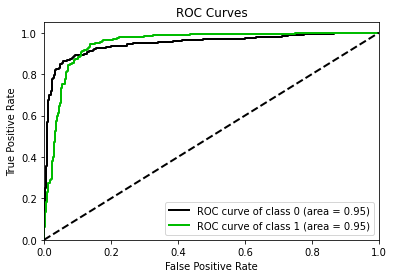

In [66]:
training_acc = round(accuracy_score(y_train, model.predict(X_train)),3)*100  
print('Training Accuracy = {}%'.format(training_acc))
print('Testing Accuracy = {}%'.format(round(accuracy_score(y_test, y_pred),3)*100))
print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_train, grid_search.best_estimator_.predict(X_train)))
print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_train, grid_search.best_estimator_.predict(X_train)))
print("AUC: ", roc_auc_score(y_train, grid_search.best_estimator_.predict_proba(X_train)[:, 1]))
auc_roc(y_train, grid_search.best_estimator_.predict_proba(X_train), curves=['each_class'])